In [22]:
import numpy as np
import scipy.signal as ssig
import matplotlib.pyplot as plt
from scipy.fft import fft

In [23]:
## Utility function

def fft_plot(s, fs, name, plottitle, normalized_freq=False):
    """
    Plots the frequency domain representation (magnitude of FFT) of a discrete signal.

    :param s: signal (1D NumPy array)
    :param fs: Sampling frequency in Hz
    :param name: Name of the signal for labeling
    :param plottitle: Title of the plot
    :param normalized_freq: If True, normalize the frequency axis to [0, 1]
    """
    N = len(s)

    # Frequency axis
    f = np.linspace(0, fs, N)

    # Compute FFT
    s_f = fft(s)
    
    N = len(s_f)
    f_final = np.arange(0,N)/N if normalized_freq else f

    # Plot only frequency domain
    plt.figure(figsize=(10, 4))
    plt.plot(f_final, np.abs(s_f))
    plt.title(plottitle)
    plt.xlabel('f [Hz]')
    plt.ylabel('|' + name + '_F(f)|')
    plt.grid(True)
    plt.show()

In [24]:
## Simulated Data ##
rand = np.random.default_rng(42)

number_samples = 100
variance = 0.1
fs = 100

t_unevenly = np.array(sorted(100 * rand.random(number_samples)))
t_evenly = np.linspace(0, 1, fs)

# x(t) = sin(2 * pi * t / 100) + noise
# we sample the sinusoid at 100 points but unevenly
y_evenly = np.sin(2 * np.pi * t_evenly)  + variance * rand.standard_normal(number_samples)

# x(t) = sin(2 * pi * t / 100) + noise
# we sample the sinusoid at 100 points but unevenly
y_unevenly = np.sin(2 * np.pi * t_unevenly)  + variance * rand.standard_normal(number_samples)

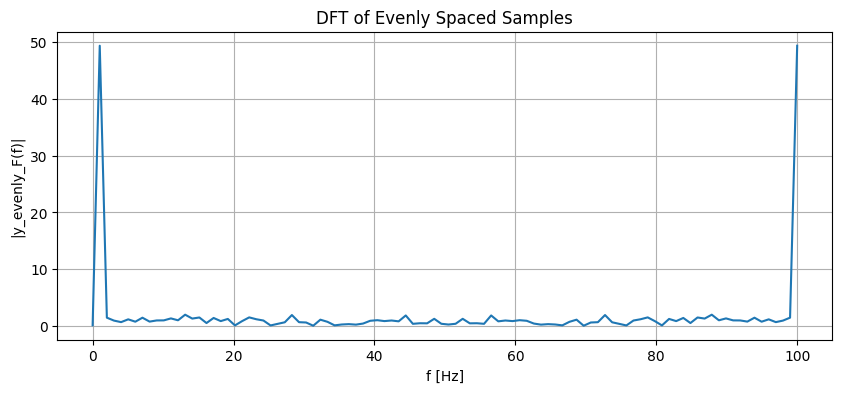

In [25]:
## Compute the DFT of the evenly sampled data ##

'''
The signal x(t) has a period of 1Hz 
We sample at 100Hz
The following plot shows the peak at f = 1
'''

fft_plot(y_evenly, fs, 'y_evenly', 'DFT of Evenly Spaced Samples', normalized_freq=False)

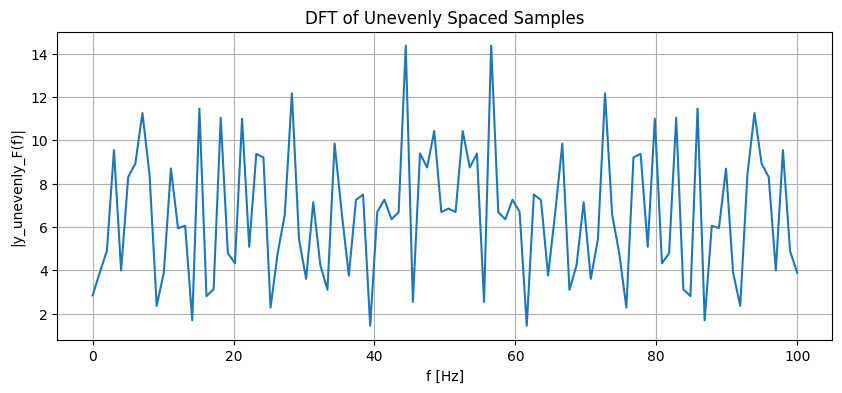

In [26]:
## Compute the DFT of the unevenly sampled data ##

'''
The signal x(t) has a period of 1Hz 
We sample at 100Hz
The following plot shows nothing interesting as expected
'''

fft_plot(y_unevenly, fs, 'y_unevenly', 'DFT of Unevenly Spaced Samples', normalized_freq=False)

Text(0.5, 0, 'Frequency [Hz]')

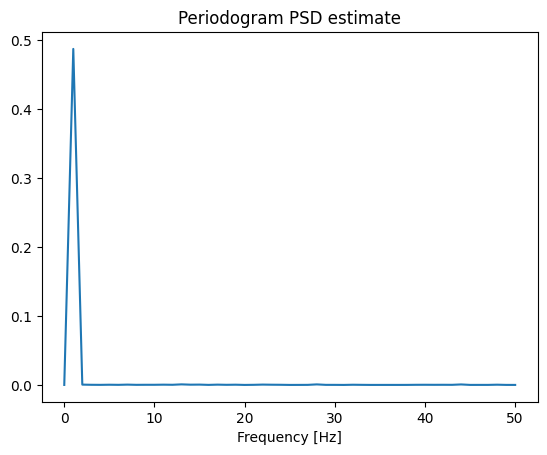

In [27]:
## Compute the Periodogram of the evenly sampled data ##

'''
The signal x(t) has a period of 1Hz 
We sample at 100Hz
The following plot shows the peak at f = 1
'''

freqs , Sper = ssig.periodogram(y_evenly, fs=fs, return_onesided=True)  
fig, ax = plt.subplots()
plt.plot(freqs, Sper)
ax.set_title("Periodogram PSD estimate")
ax.set_xlabel("Frequency [Hz]")

Text(0.5, 0, 'Frequency [Hz]')

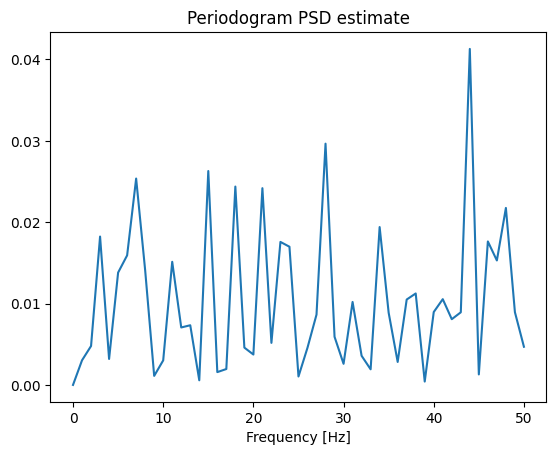

In [28]:
## Compute the Periodogram of the unevenly sampled data ##

'''
The signal x(t) has a period of 1Hz 
We sample at 100Hz
The following plot shows nothing interesting as expected
'''

freqs , Sper = ssig.periodogram(y_unevenly, fs=fs, return_onesided=True)  
fig, ax = plt.subplots()
plt.plot(freqs, Sper)
ax.set_title("Periodogram PSD estimate")
ax.set_xlabel("Frequency [Hz]")

# Real Data

In this section, we have been able to generate ECG signals and retrieve RR intervals from them using a real hardware. All information can be found in the PDF report 1. We load and compute the periodogram. 2 recordings have been made but for this report, only the second one is being shown, because it was better. To compute the RR intervals, we used a Python library called neurokit2. The script that handled that is `extract_rr.py`. The sampling frequency of the ECG signals is 250Hz.

Mean of RR intervals:  0.8420616246498599
Standard deviation of RR intervals:  0.10546886970529425


Text(0, 0.5, 'Time [s]')

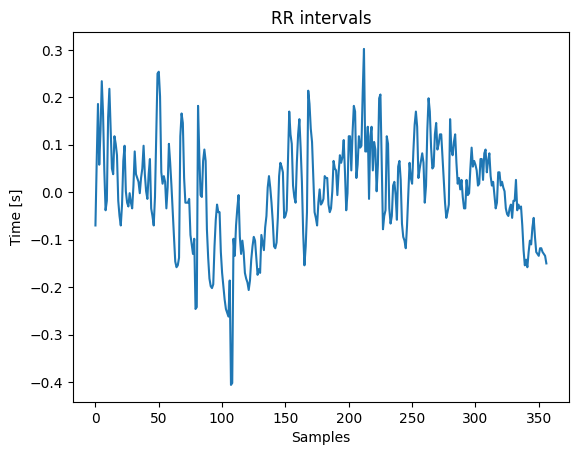

In [29]:
RR_signal = np.load('RR-2.npy')

fs_real = 250

# Remove the DC component
mean=np.mean(RR_signal)
print("Mean of RR intervals: ", mean)
print("Standard deviation of RR intervals: ", np.std(RR_signal))
RR_signal=RR_signal-mean
plt.plot(RR_signal)

plt.title("RR intervals")
plt.xlabel('Samples')
plt.ylabel('Time [s]')

Maximum value at index: 1
Frequency at maximum index: 0.0028011204481792717


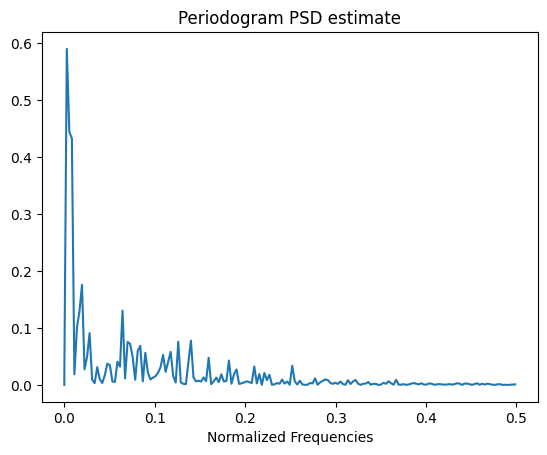

In [30]:
## Compute the Periodogram of the real data ##

'''
We plot in normamized frequencies as the argument fs has no meaning in this function. 
'''

freqs , Sper = ssig.periodogram(RR_signal, fs=1.0, return_onesided=True)  
fig, ax = plt.subplots()
plt.plot(freqs,Sper)
ax.set_title("Periodogram PSD estimate")
plt.xlabel('Normalized Frequencies')
print(f"Maximum value at index: {np.argmax(Sper)}")
print(f"Frequency at maximum index: {freqs[1]}")